In [1]:
import pandas as pd
import numpy as np
import re
import string
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer , CountVectorizer
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.metrics import accuracy_score , confusion_matrix , precision_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")

In [4]:
import nltk 
nltk.download('stopwords')
stop_words=set(stopwords.words('english'))
stop_words.remove('not')
nltk.download('punkt')
nltk.download('omw-1.4')
nltk.download('wordnet')

[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     self signed certificate in certificate chain
[nltk_data]     (_ssl.c:1129)>
[nltk_data] Error loading punkt: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     self signed certificate in certificate chain
[nltk_data]     (_ssl.c:1129)>
[nltk_data] Error loading omw-1.4: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     self signed certificate in certificate chain
[nltk_data]     (_ssl.c:1129)>
[nltk_data] Error loading wordnet: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     self signed certificate in certificate chain
[nltk_data]     (_ssl.c:1129)>


False

In [5]:
 df=pd.read_csv('generic_sentiment_dataset_50k.csv')

In [8]:
df.head(10)

,sentiment,text,label
0,positive,good mobile. battery is 5000 mah is very big. ...,2
1,positive,Overall in hand ecpirience is quite good matt ...,2
2,positive,"1. Superb Camera,\n2. No lag\n3. This is my fi...",2
3,positive,Bigger size of application names doesn't allow...,2
4,negative,Just a hype of stock android which is not flaw...,0
5,negative,First day mobile go to the conditions bad,0
6,neutral,Only for formal use its ok. If you want best c...,1
7,negative,Battery Problem After 05 Month,0
8,negative,"Confusing OS,Very low sound , worst camera qua...",0
9,neutral,Why its locked to indian Network only???\nI ca...,1


In [9]:
df.columns

Index(['sentiment', 'text', 'label'], dtype='object')

In [ ]:
# 2 for positive 
# 0 for negative

In [6]:
 df=df.drop('sentiment',axis=1)

In [7]:
def preprocess_text(text):
    text=text.lower()
    #remove urls
    text=re.sub(r"http\S+|www\S+|https\S+", "",text,flags=re.MULTILINE)
    text=text.translate(str.maketrans("", "",string.punctuation))
    text=re.sub(r'\@\w+|\#', "",text)
    text_tokens=word_tokenize(text)
    fil_words=[word for word in text_tokens if word not in stop_words]
    
    #stemming
    ps=PorterStemmer()
    stem_words=[ps.stem(w) for w in fil_words]
    
    #lemmatizing
    lemmatizer = WordNetLemmatizer()
    lem_words=[lemmatizer.lemmatize(w, pos='a') for w in stem_words]
    
    return " ".join(lem_words)
    

     

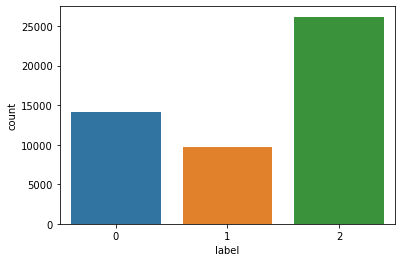

In [12]:
sns.countplot(df.label)
plt.show()

In [13]:
df.label.value_counts()

2    26180
0    14165
1     9655
Name: label, dtype: int64

In [8]:
df['clean']=df['text'].apply(preprocess_text);

In [9]:
df.drop(df[(df['label']==1)].index, inplace=True,axis=0)
df.head()
df.shape

(40345, 3)

In [16]:
def get_n_grams(text,low_n,high_n,top_number):
    
    # create vocabulary
    vec = CountVectorizer(ngram_range=(low_n,high_n)).fit(text)
    B_O_G = vec.transform(text)
    
    # Get words Count
    words_count = B_O_G.sum(axis=0)
    
    # create list of words counts
    word_counts_list = np.array(words_count)[0].tolist()
    
    # create tuple of word and words count
    data = [ (word ,word_counts_list[idx]) for word,idx in vec.vocabulary_.items() ]
    
    # sort words by count descending
    sorted_data = sorted(data,key=lambda x:x[1] ,reverse=True)
    sorted_data = sorted_data[:top_number]
    new_s = []
    for d , n in sorted_data:
        new_s.append([d ,n])
    
    del vec , data ,B_O_G ,words_count,word_counts_list ,sorted_data
    plt.figure(figsize=(10,5))
    sns.barplot(data = pd.DataFrame(new_s,columns=['word','count']),x='word',y='count')
    plt.xticks(rotation=90)
    plt.show()
    
    return pd.DataFrame(new_s,columns=['word','count'])

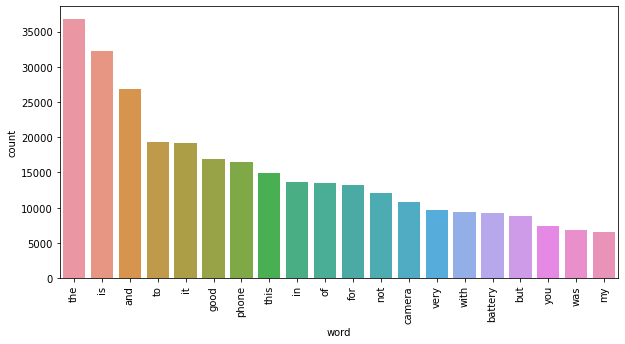

,word,count
0,the,36732
1,is,32274
2,and,26821
3,to,19379
4,it,19125
5,good,16846
6,phone,16454
7,this,14892
8,in,13670
9,of,13506


In [154]:
get_n_grams(df.text,1,1,20)

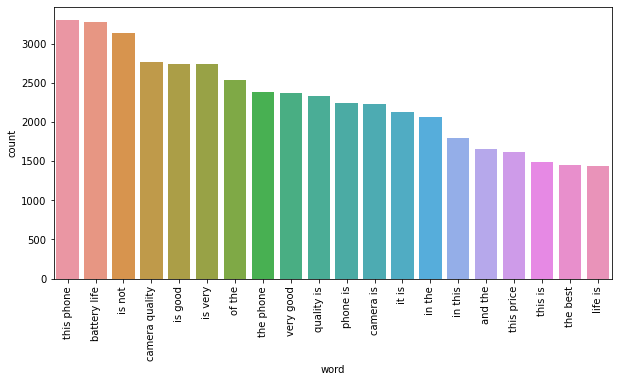

,word,count
0,this phone,3303
1,battery life,3274
2,is not,3136
3,camera quality,2768
4,is good,2736
5,is very,2735
6,of the,2535
7,the phone,2378
8,very good,2369
9,quality is,2337


In [155]:
get_n_grams(df.text,2,2,20)

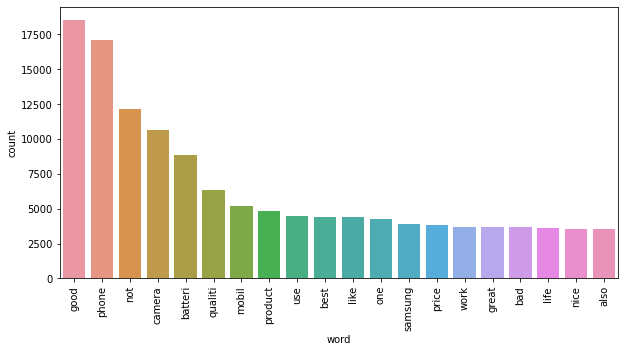

,word,count
0,good,18556
1,phone,17088
2,not,12131
3,camera,10611
4,batteri,8860
5,qualiti,6344
6,mobil,5186
7,product,4827
8,use,4463
9,best,4406


In [156]:
get_n_grams(df.clean,1,1,20)

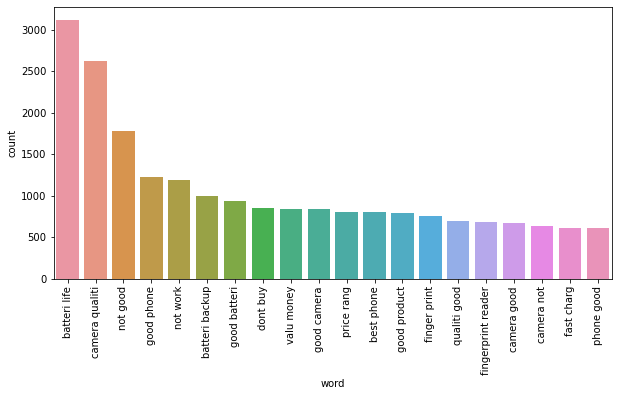

,word,count
0,batteri life,3115
1,camera qualiti,2622
2,not good,1775
3,good phone,1222
4,not work,1187
5,batteri backup,992
6,good batteri,937
7,dont buy,859
8,valu money,847
9,good camera,837


In [157]:
get_n_grams(df.clean,2,2,20)

In [10]:
 train_text=df.clean
train_on=df.label

In [11]:
df2=pd.read_csv('generic_sentiment_dataset_10k.csv')

In [19]:

df2.shape

(10000, 3)

In [20]:
df2.head()

,sentiment,text,label
0,neutral,Camera good,1
1,negative,OMG! I KNOW! I give myself a stroke everytim...,0
2,neutral,Good,1
3,positive,The company recorded revenues of E658 .1 milli...,2
4,positive,All is good,2


In [12]:
df2['clean']=df2['text'].apply(preprocess_text)
df2.drop(df2[(df2['label']==1)].index, inplace=True,axis=0)

In [13]:
test_text=df2.clean
test_on=df2.label

In [14]:
from sklearn.pipeline import Pipeline

In [15]:
def diffmodel(mod,train_text,train_on,test_text,test_on):
    try:
        model=Pipeline([('vectorizer',TfidfVectorizer()),('classifier',mod)])
        model.fit(train_text,train_on)
        prediction=model.predict(test_text)
        print(model['classifier'])
        print("Accuracy : ", accuracy_score(prediction,test_on))
        print("precision : ", precision_score(prediction,test_on,average='weighted'))
    except:
        print('can\'t',mod)

In [28]:
example = ['i m worst',
           'i m okay',
           'what is this phone',
           'battery life is good',
           'battery life is bad',
           'Battery Problem After 05 Month',
           'Phone stoped working after 5 months'
          ]
change=np.vectorize(preprocess_text)
example=change(example)
res=model.predict(example)
for i in res:
    if (i==0):
        print('NEGATIVE')
    else: 
        print('POSITIVE')

NEGATIVE
POSITIVE
POSITIVE
POSITIVE
NEGATIVE
NEGATIVE
NEGATIVE


In [27]:
models = [LogisticRegression(),SVC()]

In [18]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
for mod in tqdm(models):
    diffmodel(mod,train_text,train_on,test_text,test_on)

 50%|██████████████████████████████████████████                                          | 1/2 [00:08<00:08,  8.38s/it]

LogisticRegression()
Accuracy :  0.8957995762183721
precision :  0.8966375789618328


In [28]:
from tqdm import tqdm

In [16]:
diffmodel(LogisticRegression(),train_text,train_on,test_text,test_on)

LogisticRegression()
Accuracy :  0.8957995762183721
precision :  0.8966375789618328


In [17]:
diffmodel(SVC(),train_text,train_on,test_text,test_on)

SVC()
Accuracy :  0.9037766421538078
precision :  0.9043147977621473


In [19]:
 diffmodel(ExtraTreesClassifier(),train_text,train_on,test_text,test_on)

ExtraTreesClassifier()
Accuracy :  0.8955502929078898
precision :  0.8971697335980305


In [20]:
 diffmodel(KNeighborsClassifier(),train_text,train_on,test_text,test_on)

KNeighborsClassifier()
Accuracy :  0.722672317088371
precision :  0.8285587002164666


In [21]:
diffmodel(RandomForestClassifier(),train_text,train_on,test_text,test_on)

RandomForestClassifier()
Accuracy :  0.8950517262869251
precision :  0.8965397403631254
